<a href="https://colab.research.google.com/github/raulbenitez/PRML_Probabilistic_classifiers/blob/main/eigenfaces_classification_PCA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting the top 10 eigenfaces from 536 faces
Fitting the SVM-Linear classifier to the training set
Best estimator found by grid search:
SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Predicting people's names on the test set
               precision    recall  f1-score   support

 Colin Powell       0.59      0.83      0.69        71
George W Bush       0.91      0.74      0.82       159

     accuracy                           0.77       230
    macro avg       0.75      0.79      0.75       230
 weighted avg       0.81      0.77      0.78       230

Accuracy: 0.79 (+/- 0.16)
Extracting the top 100 eigenfaces from 536 faces
Fitting the SVM-Linear classifier to the training set
Best estimator found by grid search:
SVC(C=1, break_ties=False, cache_size=200, class_weight='balanc

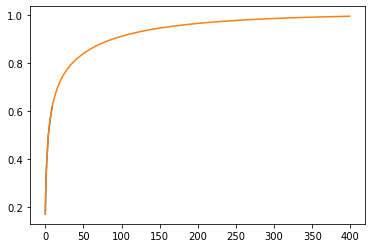

In [2]:
import logging
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

#############################################################
# LOAD LFW DATA
###############################################################################
# Load LFW dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=200,  funneled=True,resize=1)
# Get images:
n_samples, h, w = lfw_people.images.shape
# Get features data matrix (pixel intensities, 1 pixel = 1 feature):
X = lfw_people.data
n_features = X.shape[1]
# Get class vector (name of the person)
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Split dataset into train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
    
##########################################################
# EIGENFACES: Reduce dimensionality with PCA + SVM (classifier)
##########################################################
# PCA projection to a 10-dimensional PCA space:
n_components = 10
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
# Proyeccion de los datos en el espacio PCA:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

print("Fitting the SVM-Linear classifier to the training set")
param_grid = {'C': [1]}
clf1 = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf1 = clf1.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf1.best_estimator_)
print("Predicting people's names on the test set")
y_pred = clf1.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, X_test_pca, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# PCA projection to a 100-dimensional PCA space
n_components = 100
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
# Proyeccion de los datos en el espacio PCA:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Fitting the SVM-Linear classifier to the training set")
param_grid = {'C': [1]}
clf1 = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf1 = clf1.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf1.best_estimator_)
print("Predicting people's names on the test set")
y_pred = clf1.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, X_test_pca, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# PCA projection to a 400-dimensional PCA space
n_components = 400
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
# Proyeccion de los datos en el espacio PCA:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Fitting the SVM-Linear classifier to the training set")
param_grid = {'C': [1]}
clf1 = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf1 = clf1.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf1.best_estimator_)
print("Predicting people's names on the test set")
y_pred = clf1.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, X_test_pca, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Explained variance
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Ejercicio 1c:
print(confusion_matrix(y_test, y_pred))
    